In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew

Import Datasets

In [137]:
train_df = pd.read_csv('../input/train.csv')
train_df[:5]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [33]:
test_df = pd.read_csv('../input/test.csv')
test_df[:5]

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## Data Exploration

In [34]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [35]:
train_df.shape

(200000, 202)

In [36]:
train_df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


Visualizing the Santendar Customer Transactions Data

Check for Class Imbalance

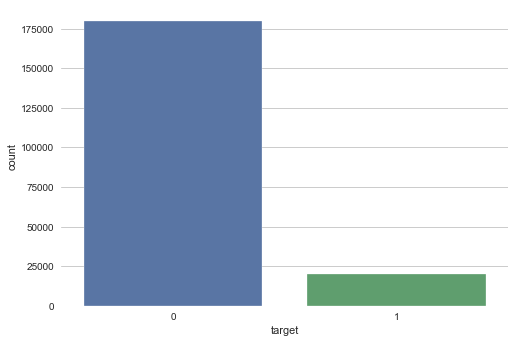

In [38]:
target = train_df['target']
train = train_df.drop(["ID_code", "target"], axis=1)
sns.set_style('whitegrid')
sns.countplot(target)

There are 10.049% target values with 1
The data is unbalanced with respect with target value.

Let's check if there are any missing data. We will also check the type of data.
We check first train.

In [138]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [145]:
%%time
missing_data(train_df)

Wall time: 6.71 s


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


Lets check test dataset now.

In [143]:
%%time
missing_data(test_df)

Wall time: 6.6 s


,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


There are no missing data in train and test datasets. Let's check the numerical values in train and test dataset.

In [146]:
%%time
train_df.describe()

Wall time: 14.6 s


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [148]:
%%time
test_df.describe()

Wall time: 10.2 s


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


Reference for distribution of mean and standard deviation.
https://www.kaggle.com/gpreda/santander-eda-and-prediction

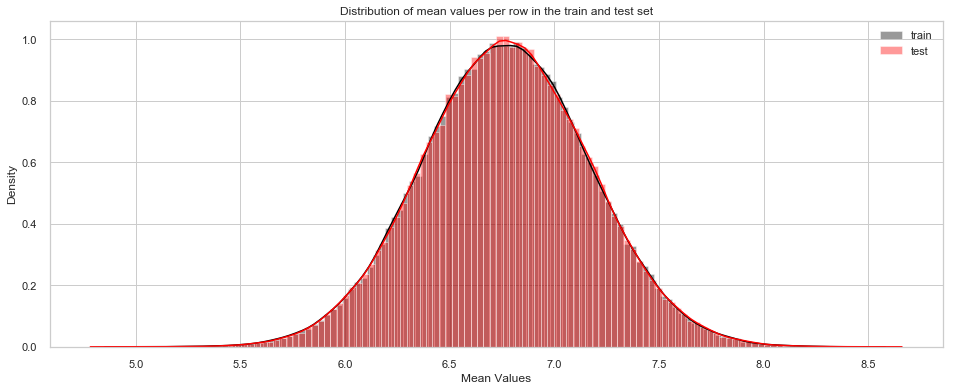

In [151]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="red", kde=True,bins=120, label='test')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Mean Values', fontsize=12)
plt.legend()
plt.show()

## Distribution for Standard Deviation

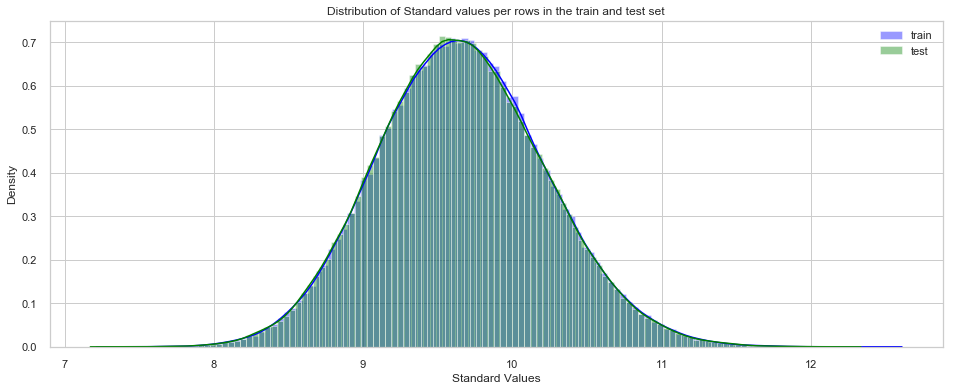

In [152]:
plt.figure(figsize=(16,6))
plt.title("Distribution of Standard values per rows in the train and test set")
sns.distplot(train_df[features].std(axis=1),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=1),color="green", kde=True,bins=120, label='test')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Standard Values', fontsize=12)
plt.legend(); plt.show()

Let's check the distribution of the standard deviation of values per columns in the train and test datasets.

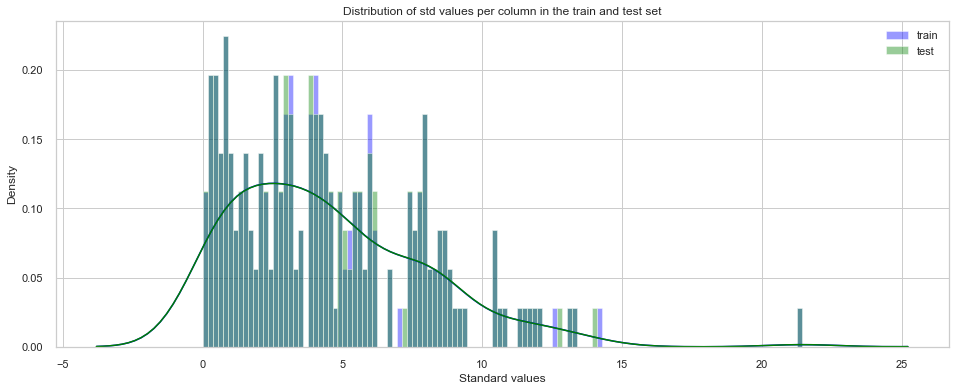

In [160]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Standard values', fontsize=12)
plt.legend(); plt.show()

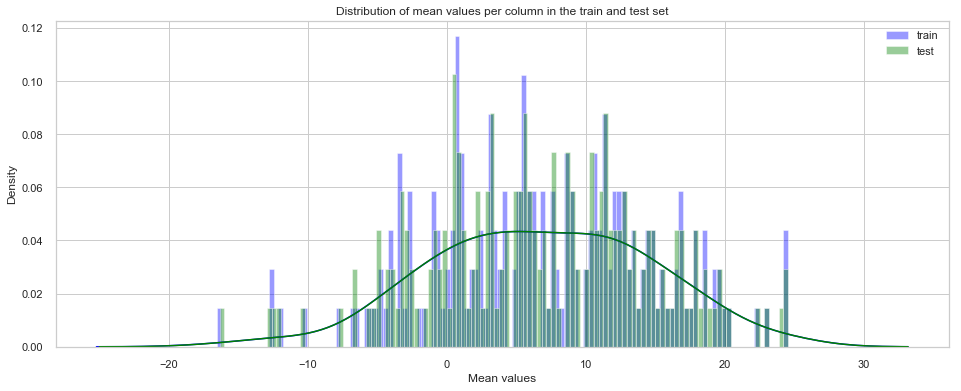

In [154]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="green", kde=True,bins=120, label='test')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Mean values', fontsize=12)
plt.legend();plt.show()

Let's check now the distribution of the mean value per row in the train dataset, grouped by value of target

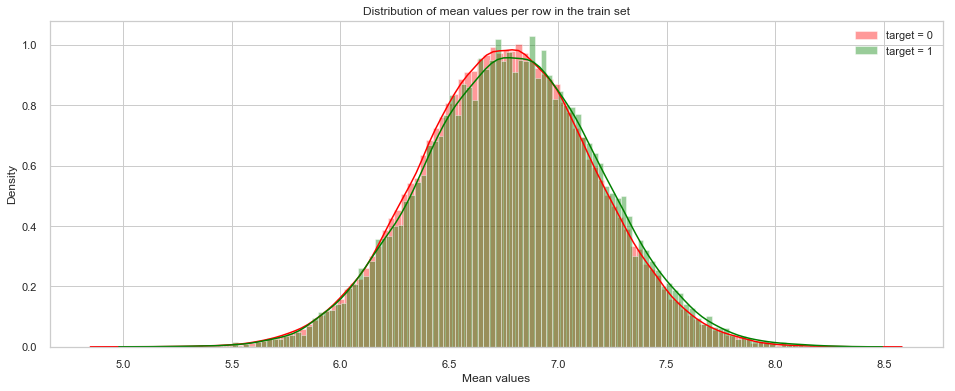

In [155]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="green", kde=True,bins=120, label='target = 1')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Mean values', fontsize=12)
plt.legend(); plt.show()

Let's check now the distribution of the mean values per columns in the train datasets.

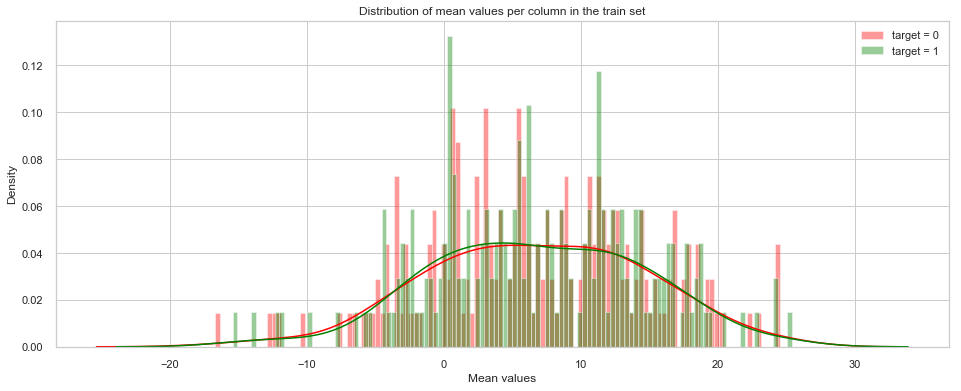

In [156]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 1')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Mean values', fontsize=12)
plt.legend(); plt.show()

The distribution of the standard deviation  per row in the train dataset, grouped by value of target

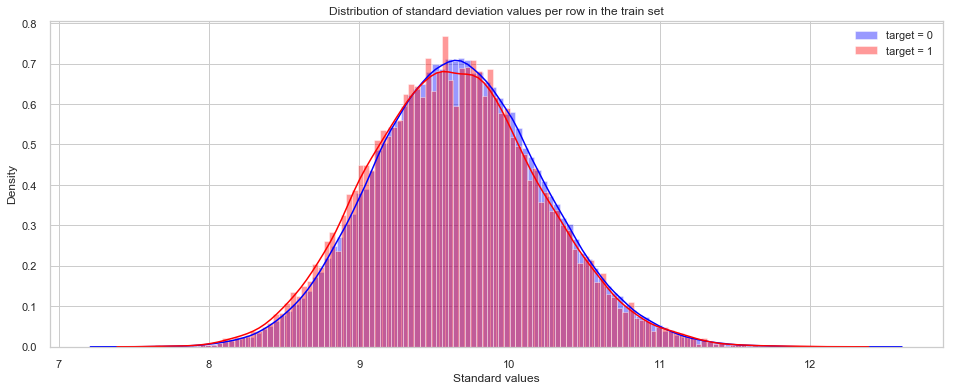

In [157]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of standard deviation values per row in the train set")
sns.distplot(t0[features].std(axis=1),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=1),color="red", kde=True,bins=120, label='target = 1')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Standard values', fontsize=12)
plt.legend(); plt.show()

Lets check the distribution of standard deviation per columns in the train and test datasets.

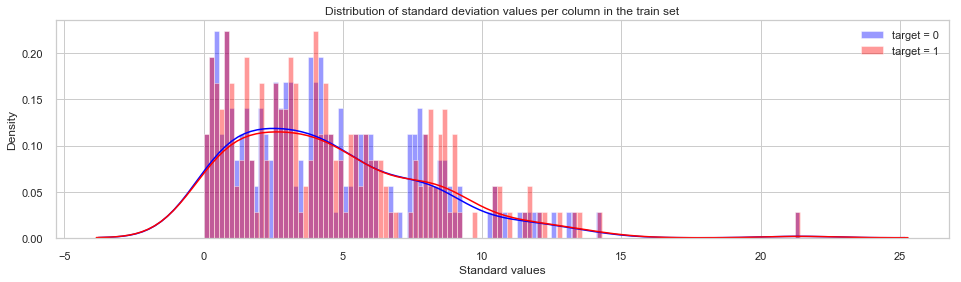

In [161]:
t0 = train_df.loc[target  == 0]
t1 = train_df.loc[target  == 1]
plt.figure(figsize=(16,4))
plt.title("Distribution of standard deviation values per column in the train set")
sns.distplot(t0[features].std(axis=0),color="blue", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].std(axis=0),color="red", kde=True,bins=120, label='target = 1')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Standard values', fontsize=12)
plt.legend(); plt.show()

## Distribution of Skewness

Let's see now the distribution of skewness on rows in train separated for values of target 0 and 1. We found the distribution is left skewed

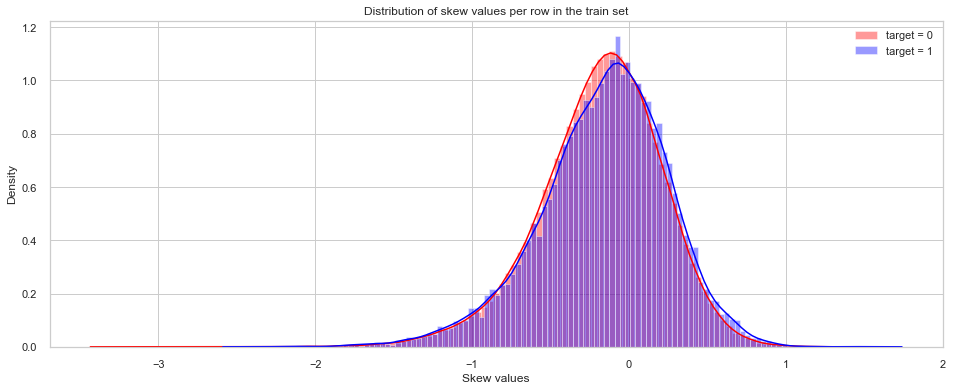

In [159]:
t0 = train_df.loc[target == 0]
t1 = train_df.loc[target == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per row in the train set")
sns.distplot(t0[features].skew(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.ylabel('Density', fontsize=12)
plt.xlabel('Skew values', fontsize=12)
plt.legend(); plt.show()

## Benchmark Model: 

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [66]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']] #basic features
target = train_df['target']
param = {
    'bagging_freq': 5,          
    'bagging_fraction': 0.38,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.04,     'learning_rate': 0.0085,
    'max_depth': -1,             'metric':'auc',                'min_data_in_leaf': 80,     'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,            'num_threads': 8,              'tree_learner': 'serial',   'objective': 'binary',
    'reg_alpha': 0.1302650970728192, 'reg_lambda': 0.3603427518866501,'verbosity': 1
}
folds = StratifiedKFold(n_splits=12, shuffle=False, random_state=99999)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

CV score: 0.50000 


## Modeling

Let's separate input variables and target variable. Have also created a features list with all input variable names.

In [ ]:
# Target variable from the Training Set
Target = train_df['target']

# Input dataset for Train and Test 
train_inp = train_df.drop(columns = ['target', 'ID_code'])
test_inp = test_df.drop(columns = ['ID_code'])

# List of feature names
features = list(train_inp.columns)

## Logistic Regression
We start with most basic algorithm used for classification problems. Initial model with defining only the regularization paramenter (C) yielded 0.6 AUC. Since this is an unbalanced dataset, we need to define another paramenter 'class_weight = balanced' which will give equal weights to both the targets irrespective of their reperesentation in the training dataset. We can even define classwise weights using this parameter, if needed


In [165]:
X_train, X_test, Y_train, Y_test = train_test_split(train_inp, Target, 
                                                    test_size= 0.3, random_state = 2019)
param_grid = {'C': [0.001, 0.01, 0.0005] }
clf = GridSearchCV(LogisticRegression(penalty=['l1','l2']), param_grid)
best_clf = clf.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [140000, 100000]

In [ ]:
# Split the Train Dataset into training and validation sets for model building. 
# The training set now has 140K records and validation set has 60K records

X_train, X_test, Y_train, Y_test = train_test_split(train_inp, Target, 
                                                    test_size= 0.3, random_state = 2019)

# Create an object of Logistic Regression with parameters C and class_weight
logist = LogisticRegression(C=0.001, class_weight='balanced')

# Fit the training data on this object
logist.fit(X_train, Y_train)


In [ ]:
# Predict the Target for validation dataset 
logist_pred = logist.predict_proba(X_test)[:,1]

In [116]:
logist_pred

array([0.43014786, 0.64587956, 0.73623148, ..., 0.52145802, 0.68198509,
       0.14182677])

## Performance Function
Since we will be building multiple models, it is advisable to create a function that can be called with different outputs of each model. This is a simple function which takes in the Predicted Validation Target and Actual Validation Target. It then gives out classification summary like confusion matrix and AUC score



In [117]:
def performance(Y_test, logist_pred):
    logist_pred_var = [0 if i < 0.5 else 1 for i in logist_pred]
    print('Confusion Matrix:')
    print(confusion_matrix(Y_test, logist_pred_var)) 
      
    #print(classification_report(Y_test, logist_pred)) 

    fpr, tpr, thresholds = roc_curve(Y_test, logist_pred, pos_label=1)
    print('AUC:')
    print(auc(fpr, tpr))

In [118]:
performance(Y_test, logist_pred)

Confusion Matrix:
[[42214 11737]
 [ 1404  4645]]
AUC:
0.8541971488679537


## Logistic Regresssion Result
This model gave out an AUC of 0.854 on validation set and 0.855 on Public Leaderboard for the test file

In [119]:
# Submission dataframe
logist_pred_test = logist.predict_proba(test_inp)[:,1]

submit = test_df[['ID_code']]
submit['target'] = logist_pred_test

submit.head()

C:\Users\guest1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,ID_code,target
0,test_0,0.629326
1,test_1,0.644884
2,test_2,0.280323
3,test_3,0.707576
4,test_4,0.498025


In [120]:
# Create the Submission File using logistic regression model
submit.to_csv('log_reg_baseline.csv', index = False)

## Decision Trees
Moving on to a slightly advanced algorithm, decision trees. Again, the parameters here are class_weight to deal with unbalanced target variable, random_state for reproducability of same trees. The feature max_features and min_sample_leaf are used to prune the tree and avoid overfitting to the training data.

Max_features defines what proportion of available input features will be used to create tree.

Min_sample_leaf restricts the minimum number of samples in a leaf node, making sure none of the leaf nodes has less than 80 samples in it. If leaf nodes have less samples it implies we have grown the tree too much and trying to predict each sample very precisely, thus leading to overfitting.


In [121]:
# Create Decision Tree Classifier object with few parameters
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 2019, 
                                  max_features = 0.7, min_samples_leaf = 80)

# Fit the object on training data
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=80, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')

## Decision Tree Results:
Basic decision tree is giving us 0.651 AUC score on the validation set and 0.650 AUC score on the test set submitted on public leaderboard

In [123]:
# Predict for validation set and check the performance
tree_preds = tree_clf.predict_proba(X_test)[:, 1]
performance(Y_test, tree_preds)

Confusion Matrix:
[[35314 18637]
 [ 2629  3420]]
AUC:
0.6514727493199708


In [124]:
# Submission dataframe
tree_pred_test = tree_clf.predict_proba(test_inp)[:, 1]

submitTree = test_df[['ID_code']]
submitTree['target'] = tree_pred_test

# Create the Submission File using logistic regression model
submitTree.to_csv('Decision_Tree.csv', index = False)

C:\Users\guest1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [125]:
# Extract feature importances
feature_importance_values = tree_clf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

,feature,importance
81,var_81,0.056765
139,var_139,0.049708
12,var_12,0.036840
26,var_26,0.031179
146,var_146,0.028163
110,var_110,0.025983
109,var_109,0.025306
53,var_53,0.025013
6,var_6,0.016548
166,var_166,0.016331


Let's take a look at these features and plot them on a box and whiskrers chart 

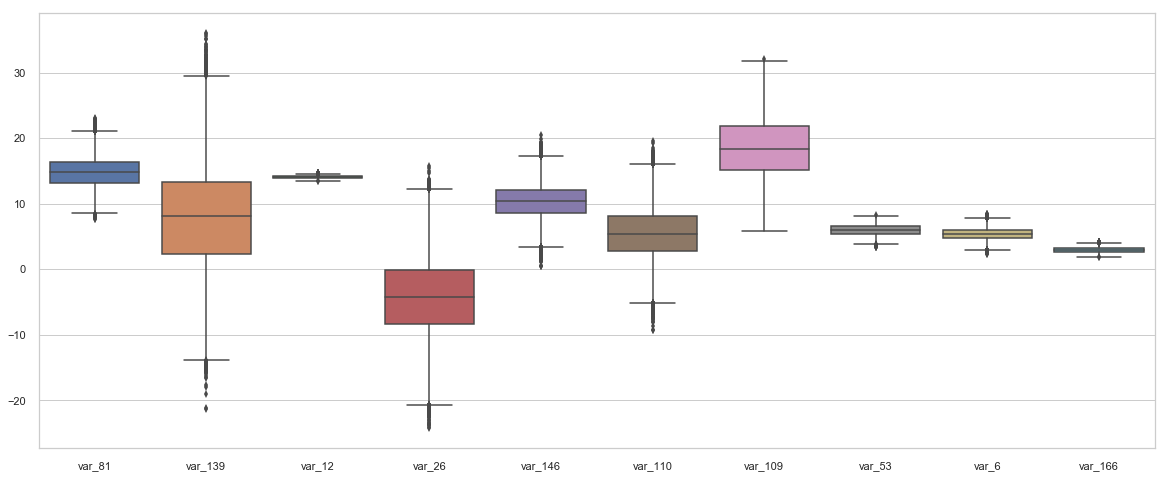

In [127]:
plt.figure(figsize=(20,8))
sns.boxplot(data=train_df[['var_81', 'var_139', 'var_12', 'var_26', 'var_146', 'var_110',
                        'var_109', 'var_53', 'var_6', 'var_166']])

## Ensemble Learning
Ensemble Learning refers to the algorithms that created using ensembles of variour learning algorithms. So, to give you an example, random forests are ensembles of many decision tree estimators.

There are 2 types of ensemble learning algorithms - 1. Bagging Algorithms: Bagging involves having each model in the ensemble vote with equal weight for the final output. In order to promote model variance, bagging trains each model in the ensemble using a randomly drawn subset of the training set 2. Boosting Algorithms: As Wikipedia defines, boosting involves incrementally building an ensemble by training each new model instance to emphasize the training instances that previous models mis-classified.

## Random Forest
Let's start with building a random forest, with parameters like class_weight, random_state, and hyperparameters like max_features and min_sample_leaf as earlier. We have also defined the n_estimators which is a compulsory parameter. This defines the number of decision trees that will be present in the forest.

In [128]:
# Create random Forest Object using the mentioned parameters
##random_forest = RandomForestClassifier(n_estimators=100, random_state=2019, verbose=1,
#                                      class_weight='balanced', max_features = 0.5, 
#                                       min_samples_leaf = 100)
random_forest=RandomForestClassifier(random_state=0).fit(X_train, Y_train)


# Fit the object on training set 
#random_forest.fit(X_train, Y_train)

C:\Users\guest1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Random Forest Results : 

In [129]:
# Predict the validation set target and check the performance
forest_preds = random_forest.predict_proba(X_test)[:, 1]
performance(Y_test, forest_preds)

Confusion Matrix:
[[53538   413]
 [ 5745   304]]
AUC:
0.6972558176791264


In [132]:
# Submission dataframe
forest_pred_test = random_forest.predict_proba(test_inp)[:, 1]

submitForest = test_df[['ID_code']]
submitForest['target'] = forest_pred_test

# Create the Submission File using logistic regression model
submitForest.to_csv('Random_Forest.csv', index = False)

C:\Users\guest1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


The feature importance we get from random forest is very similar to the list we got from decision trees

In [133]:
# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})
feature_importances.sort_values(by='importance', ascending=False).head(n=10)

,feature,importance
81,var_81,0.012566
12,var_12,0.010537
26,var_26,0.009741
139,var_139,0.009478
174,var_174,0.008804
146,var_146,0.008778
53,var_53,0.008695
166,var_166,0.008676
110,var_110,0.008359
22,var_22,0.007961


## Light Gradient Boosting Method

Light GBM is a gradient boosting framework that uses tree based learning algorithm. It grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

It is ‘Light’ because of its high speed. It can handle large data, requires low memory to run and focuses on accuracy of results. Also supports GPU learning and thus data scientists/ Kagglers are widely using LGBM for data science application development.

In [134]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

In [135]:
features = [c for c in train_df.columns if c not in ['ID_code', 'target']] #basic features
target = train_df['target']
param = {
    'bagging_freq': 5,          
    'bagging_fraction': 0.38,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.04,     'learning_rate': 0.0085,
    'max_depth': -1,             'metric':'auc',                'min_data_in_leaf': 80,     'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,            'num_threads': 8,              'tree_learner': 'serial',   'objective': 'binary',
    'reg_alpha': 0.1302650970728192, 'reg_lambda': 0.3603427518866501,'verbosity': 1
}
folds = StratifiedKFold(n_splits=12, shuffle=False, random_state=99999)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 2000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits
print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))
sub = pd.DataFrame({"ID_code": test_df.ID_code.values})
sub["target"] = predictions
sub.to_csv("submission.csv", index=False)

Fold 0
Training until validation scores don't improve for 2000 rounds.
[5000]	training's auc: 0.925151	valid_1's auc: 0.898164
[10000]	training's auc: 0.940839	valid_1's auc: 0.901261
Early stopping, best iteration is:
[10313]	training's auc: 0.941697	valid_1's auc: 0.901416
Fold 1
Training until validation scores don't improve for 2000 rounds.
[5000]	training's auc: 0.925388	valid_1's auc: 0.897582
[10000]	training's auc: 0.941018	valid_1's auc: 0.899296
[15000]	training's auc: 0.953868	valid_1's auc: 0.899497
Early stopping, best iteration is:
[13782]	training's auc: 0.950925	valid_1's auc: 0.899681
Fold 2
Training until validation scores don't improve for 2000 rounds.
[5000]	training's auc: 0.925878	valid_1's auc: 0.889935
[10000]	training's auc: 0.941418	valid_1's auc: 0.892076
Early stopping, best iteration is:
[11513]	training's auc: 0.945485	valid_1's auc: 0.892175
Fold 3
Training until validation scores don't improve for 2000 rounds.
[5000]	training's auc: 0.924659	valid_1's au

## Light GBM Results:
The AUC Score drastically improves from 0.650 in our Decision Tree model to an AUC score of 0.9 in our ensemble of trees, Light GBM model. 
The feature importance though, it has some variables similar to those we saw in the tree models but majority of them are new in the top 10 most important variable list

## References:

https://www.kaggle.com/mjbahmani/santander-ml-explainability
https://www.kaggle.com/roydatascience/eda-pca-lgbm-santander-transactions
https://www.kaggle.com/gpreda/santander-eda-and-prediction
https://www.kaggle.com/jesucristo/30-lines-starter-solution-fast/comments